In [3]:
from ultralytics import YOLO
from PIL import Image
import cv2

In [4]:
model = YOLO('yolov8n.pt')
# model = YOLO('yolov8n.yaml')

model.train(data='./poker_card_dataset/data.yaml', epochs=300)

Ultralytics YOLOv8.0.131 🚀 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2060, 5918MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./poker_card_dataset/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 


image 1/1 /home/payetquentin/Documents/workspace/yolo_base/IMG_20220316_135316_jpg.rf.73bfd93ba6f1293a44936e5ed9656fa4.jpg: 480x640 2 2 Heartss, 1 3 Hearts, 1 4 Hearts, 1 A Spades, 5.2ms
Speed: 1.9ms preprocess, 5.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


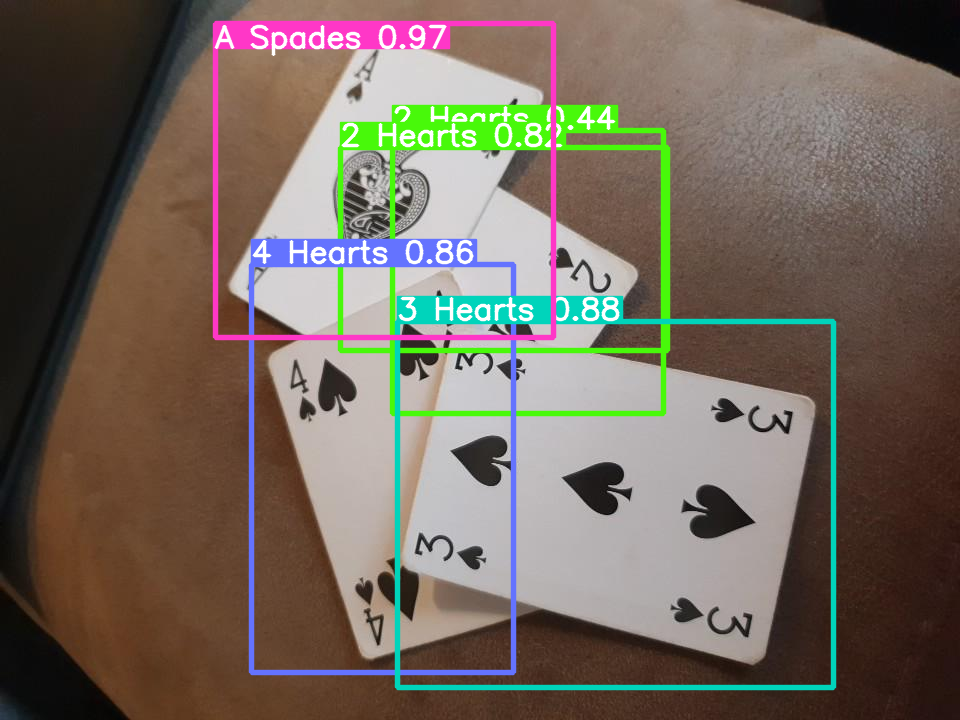

In [7]:
# model.predict()
result = model("./IMG_20220316_135316_jpg.rf.73bfd93ba6f1293a44936e5ed9656fa4.jpg")
# result = model("./IMG_20220316_140831_jpg.rf.eb9516d4293c148c734d0f55f5ea9fab.jpg")
# result = model("./AcetoFive.jpeg")

# Get result image
result_array = result[0].plot()
# Fix BGR2RGB issue
result_rgb = cv2.cvtColor(result_array, cv2.COLOR_BGR2RGB)
# Save image to PIL format
result_image = Image.fromarray(result_rgb)

display(result_image)

In [8]:
model.export()

Ultralytics YOLOv8.0.131 🚀 Python-3.11.3 torch-2.0.1+cu117 CPU

PyTorch: starting from /home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 57, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.1+cu117...
TorchScript: export success ✅ 0.9s, saved as /home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights/best.torchscript (11.9 MB)

Export complete (1.1s)
Results saved to /home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights
Predict:         yolo predict task=detect model=/home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights/best.torchscript imgsz=640 
Validate:        yolo val task=detect model=/home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights/best.torchscript imgsz=640 data=./poker_card_dataset/data.yaml 
Visualize:       https://netron.app


'/home/payetquentin/Documents/workspace/briefs/S6_yolo/runs/detect/train21/weights/best.torchscript'


image 1/1 /home/payetquentin/Documents/workspace/yolo_base/IMG_20220316_140831_jpg.rf.eb9516d4293c148c734d0f55f5ea9fab.jpg: 480x640 1 5 Hearts, 1 6 Spades, 1 7 Spades, 1 8 Spades, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


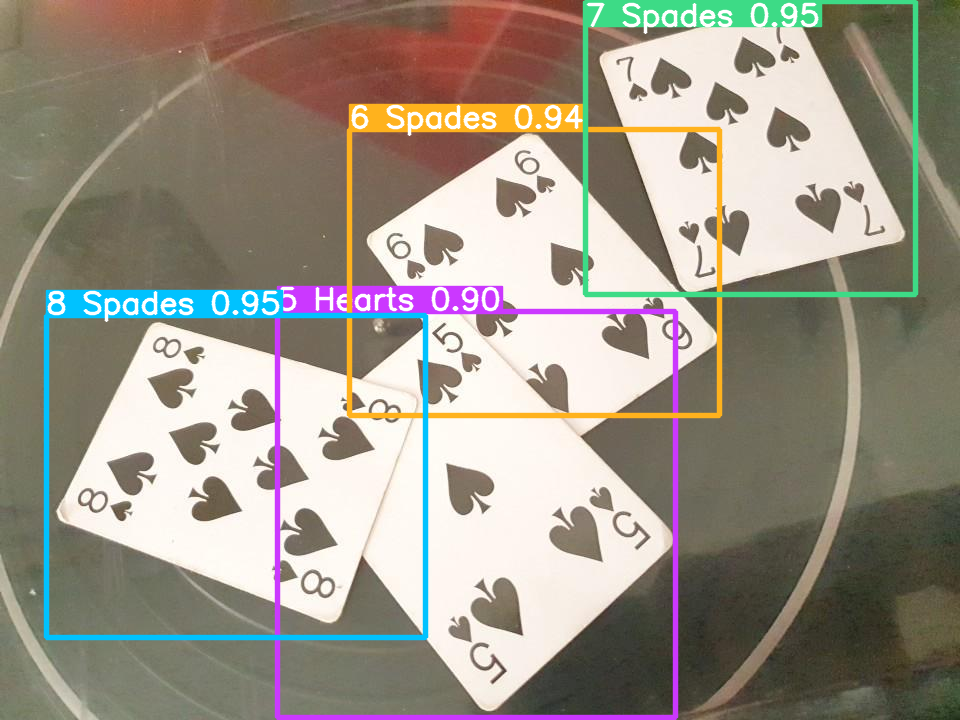

In [9]:
custom_model = YOLO('best.pt')
result = custom_model("./IMG_20220316_140831_jpg.rf.eb9516d4293c148c734d0f55f5ea9fab.jpg")

# Get result image
result_array = result[0].plot()
# Fix BGR2RGB issue
result_rgb = cv2.cvtColor(result_array, cv2.COLOR_BGR2RGB)
# Save image to PIL format
result_image = Image.fromarray(result_rgb)

display(result_image)